<a href="https://colab.research.google.com/github/dks-2004/Customer-Feedback-Uing-K-Clustering-and-Elbow-Method/blob/main/CustomerFeedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sentiment=pd.read_csv('/content/drive/MyDrive/sentimentanalysis.csv')

In [ ]:
sentiment.head(10)

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."
5,"""The quality of this product is subpar."", Nega..."
6,"""I can't stop listening to this song. It's inc..."
7,"""Their website is so user-friendly. Love it!"",..."
8,"""I loved the movie! It was fantastic!"", Positi..."
9,"""The customer service was terrible."", Negative..."


In [ ]:
if sentiment.isnull().values.any():
  sentiment.dropna(inplace=True)

In [ ]:
# Check the column names in the DataFrame
print(sentiment.columns)


Index(['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'], dtype='object')


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentiment['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'])

In [ ]:
inertia = []
k_range = range(1,8)

In [ ]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Fit KMeans on the TF-IDF matrix
    inertia.append(kmeans.inertia_)


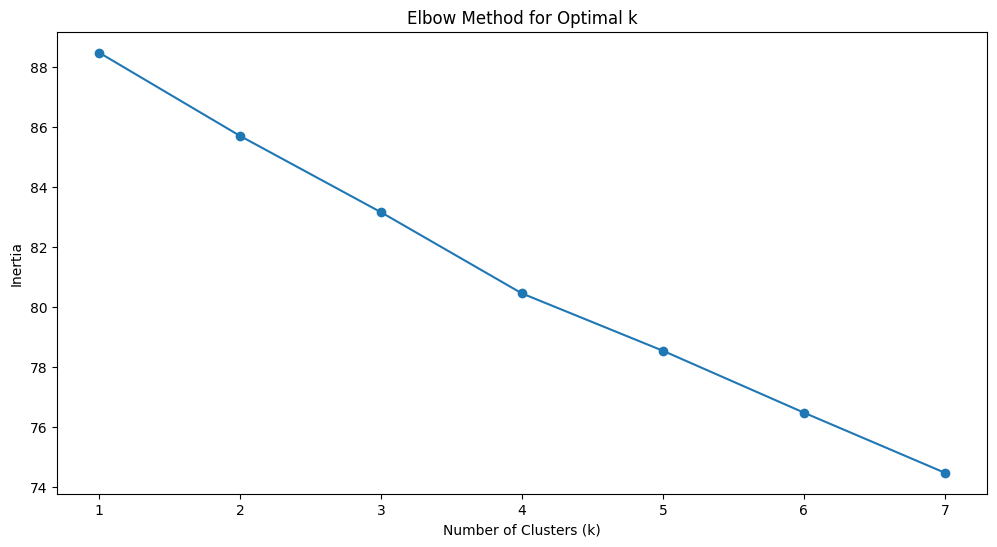

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
k = 3  # Choose based on the previous analysis
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
sentiment['cluster'] = kmeans.labels_

In [ ]:
for i in range(k):
    print(f"\nCluster {i}:")
    print(sentiment[sentiment['cluster'] == i]['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].values)


Cluster 0:
['"I love this product!", Positive, Twitter, 2023-06-15 09:23:14, @user123, New York, 0.85'
 '"This movie is amazing!", Positive, IMDb, 2023-06-15 14:10:22, moviefan789, London, 0.92'
 '"This book made me feel inspired. Highly recommended!", Positive, Goodreads, 2023-07-02 12:34:56, bookworm789, London, 0.88'
 '"Just had the most amazing vacation! I can\'t wait to go back.", Positive, TripAdvisor, 2023-07-02 18:01:23, travelenthusiast1, Sydney, 0.93'
 '"I had an incredible experience at the theme park. So much fun!", Positive, Trip Report, 2023-07-03 14:40:05, thrillseeker1, Orlando, 0.89'
 '"This movie is a masterpiece! I was blown away.", Positive, IMDb, 2023-07-04 14:05:27, cinephile789, Los Angeles, 0.93'
 '"I\'m disappointed with the ending of this book. It fell flat.", Negative, Goodreads, 2023-07-04 19:18:53, booklover123, London, 0.68'
 '"I can\'t get enough of this band. Their music is incredible!", Positive, Music Review, 2023-07-06 14:15:23, musiclover987, London

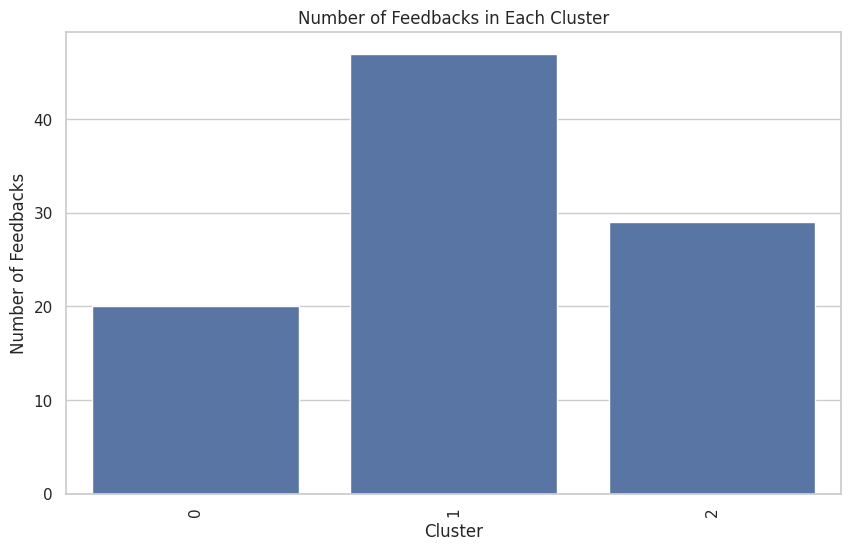

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=sentiment)
plt.title('Number of Feedbacks in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Feedbacks')
plt.xticks(rotation=90)
plt.show()